In [1]:
import sqlite3
import pandas as pd

db_name = 'db.sqlite3'
con = sqlite3.connect(db_name)

In [2]:
df = pd.read_sql_query('select * from history', con)
df.exec_date = pd.to_datetime(df.exec_date)
df = df.set_index('exec_date')
df = df.loc['2016-03':]
df = df[['id', 'side', 'price', 'size']]
df

,id,side,price,size
exec_date,,,,
2016-03-01 00:01:03.673,796290,SELL,49904,0.050000
2016-03-01 00:01:14.470,796292,SELL,49905,0.039000
2016-03-01 00:01:14.517,796293,SELL,49904,0.350000
2016-03-01 00:02:06.880,796294,BUY,49889,0.060000
2016-03-01 00:03:01.390,796295,BUY,49885,0.019000
2016-03-01 00:03:08.307,796297,SELL,49857,0.010000
2016-03-01 00:03:11.560,796298,BUY,49885,0.074000
2016-03-01 00:03:15.713,796299,BUY,49887,3.524000
2016-03-01 00:03:39.863,796306,BUY,49899,0.095000


In [3]:
bench_price = df.price.resample('15Min').mean().fillna(method='ffill')
bench_size = df['size'].resample('15Min').sum().fillna(0)
dfb = pd.DataFrame([bench_price, bench_size]).T
dfb

,price,size
exec_date,,
2016-03-01 00:00:00,4.994609e+04,25.987227
2016-03-01 00:15:00,4.998313e+04,15.549000
2016-03-01 00:30:00,5.001167e+04,51.568396
2016-03-01 00:45:00,5.011319e+04,4.485000
2016-03-01 01:00:00,4.989262e+04,30.907859
2016-03-01 01:15:00,4.992312e+04,16.026564
2016-03-01 01:30:00,4.991145e+04,6.549000
2016-03-01 01:45:00,4.989500e+04,5.048000
2016-03-01 02:00:00,4.989188e+04,34.441220


In [4]:
dfb['pma12'] = dfb.price / dfb.price.rolling(12).mean() - 1
dfb['pma96'] = dfb.price / dfb.price.rolling(96).mean() - 1
dfb['pma672']= dfb.price / dfb.price.rolling(672).mean()- 1

In [5]:
p = dfb.price
v = dfb['size']

def avg(p, n):
    return p.rolling(n).mean()

def std(p, n):
    return p.rolling(n).std()

In [6]:
dfb['ma4_36'] = avg(p, 4) / avg(p, 36) - 1
dfb['ma12_96']= avg(p, 12)/ avg(p, 96) - 1
dfb['ac12_12']= (p / avg(p, 12)) / avg(p / avg(p, 12), 12)
dfb['ac96_96']= (p / avg(p, 96)) / avg(p / avg(p, 96), 12)

In [7]:
dfb['vma12'] = v / avg(v, 12) - 1
dfb['vma96'] = v / avg(v, 96) - 1
dfb['vma672']= v / avg(v, 672)- 1

In [8]:
dfz = dfb
def zs(p, n):
    return (p - p.rolling(n).mean()) / p.rolling(n).std()

In [9]:
label_list = [
    'pma12', 'pma96', 'pma672', 'ma4_36', 'ma12_96', 'ac12_12', 'ac96_96',
    'vma12', 'vma96', 'vma672'
]
for label in label_list:
    dfz[label] = zs(dfz[label], 96)
dfz

,price,size,pma12,pma96,pma672,ma4_36,ma12_96,ac12_12,ac96_96,vma12,vma96,vma672
exec_date,,,,,,,,,,,,
2016-03-01 00:00:00,4.994609e+04,25.987227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-01 00:15:00,4.998313e+04,15.549000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-01 00:30:00,5.001167e+04,51.568396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-01 00:45:00,5.011319e+04,4.485000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-01 01:00:00,4.989262e+04,30.907859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-01 01:15:00,4.992312e+04,16.026564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-01 01:30:00,4.991145e+04,6.549000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-01 01:45:00,4.989500e+04,5.048000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-01 02:00:00,4.989188e+04,34.441220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
dfz['vZ12'] = zs(v, 12)
dfz['vZ96'] = zs(v, 96)
dfz['vZ672']= zs(v, 672)

In [11]:
import chainer
import chainerrl
import numpy as np
from gym import spaces
import random

In [12]:
r_label_list = [
    'r', 'r_1', 'r_2',
#     'rZ12', 'rZ96', 'vol12',
#     'vol96', 'vol672', 'dv12_96', 'dv96_672'
]
for r_label in r_label_list:
    dfz[r_label] = 0
dfz['state'] = 0

In [13]:
dfz['pZ12'] = zs(p, 12)
dfz['pZ96'] = zs(p, 96)
dfz['vol12'] = zs(std(p, 12), 96)
dfz['vol96'] = zs(std(p, 96), 96)
dfz['vol672']= zs(std(p, 672), 96)
dfz['dv12_96'] = zs(std(p, 12) / avg(std(p, 12), 96), 96)
dfz['dv96_672']= zs(std(p, 96) / avg(std(p, 96), 672), 96)
dfz['utctime'] = (dfz.index.hour * 4 + dfz.index.minute / 15) / 96

In [14]:
dfz

,price,size,pma12,pma96,pma672,ma4_36,ma12_96,ac12_12,ac96_96,vma12,...,r_2,state,pZ12,pZ96,vol12,vol96,vol672,dv12_96,dv96_672,utctime
exec_date,,,,,,,,,,,,,,,,,,,,,
2016-03-01 00:00:00,4.994609e+04,25.987227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2016-03-01 00:15:00,4.998313e+04,15.549000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010417
2016-03-01 00:30:00,5.001167e+04,51.568396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020833
2016-03-01 00:45:00,5.011319e+04,4.485000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.031250
2016-03-01 01:00:00,4.989262e+04,30.907859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041667
2016-03-01 01:15:00,4.992312e+04,16.026564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052083
2016-03-01 01:30:00,4.991145e+04,6.549000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062500
2016-03-01 01:45:00,4.989500e+04,5.048000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.072917
2016-03-01 02:00:00,4.989188e+04,34.441220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.083333


In [15]:
dfz[dfz.ac96_96.isnull()].shape, dfz[dfz.dv96_672.isnull()].shape

((201, 27), (861, 27))

In [16]:
indicator = dfz.reset_index().loc[:,'pma12':'utctime']
price_history = dfz.reset_index().price
indicator

,pma12,pma96,pma672,ma4_36,ma12_96,ac12_12,ac96_96,vma12,vma96,vma672,...,r_2,state,pZ12,pZ96,vol12,vol96,vol672,dv12_96,dv96_672,utctime
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010417
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020833
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.031250
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041667
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052083
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062500
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.072917
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.083333
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.093750


In [26]:
import numpy as np
from gym import spaces
import random
# xp = chainer.cuda.cupy


class History:
    OFFSET = 861
    ACTIONS = 5  # 取れる行動の種類数
    OBS_SIZE = 25  # エージェントの観察値の種類数
    EPISODE_LEN = 200

    def __init__(self, price_hist, indicator):
        self.price = price_hist  # btc価値推移(pd.Series:分刻み?) 0-indexed
        self.indicator = indicator
        self.index = self.OFFSET
        self.action_space = spaces.Discrete(self.ACTIONS)

    def reset(self):
        """
        環境の初期化をする
        """
        self.index = random.randint(self.OFFSET - 1, self.price.size - self.EPISODE_LEN - 1000)
        return self._get_observe()

    def _get_observe(self):
        if self.index == self.price.size - 3:
            return None
        obs = np.array(self.indicator.loc[self.index].fillna(0), dtype=np.float32)
#         print(self.price[self.index - self.TIME_UNIT - 1: self.index + 1])
        return obs

    def render(self):
        """
        ステップごとの描画関数
        """
        pass

    def step(self, action):
        """
        agentが選んだ行動が与えられるので
        環境を変更し，観察値や報酬を返す

        :param int action: どの行動を選んだか
        :return:
            observe: numpy array: 環境の観察値を返す
            reward : float      : 報酬
            done   : boolean    : 終了したか否か
            info   : str (自由?): (デバッグ用などの)情報
        """
        pre_obs = self.indicator.loc[self.index]
        action_pre = pre_obs['state']
        self.index += 1
        price = self.price[self.index]
        price_next = self.price[self.index + 1]
        sgn = 1 if price_next > price else -1
        reward = (action - 2) / 2 * sgn
        self.indicator.loc[self.index + 1, 'r'] = reward
        self.indicator.loc[self.index + 2, 'r_1'] = reward
        self.indicator.loc[self.index + 3, 'r_2'] = reward
        self.indicator.loc[self.index, 'state'] = action

        observe = self._get_observe()
        done = observe is None
        info = 'price=%d idx=%d act=%d rwd=%f' % (
            price, self.index, action, reward
        )
        return observe, reward, done, info

    def get_action_space(self):
        """
        :return: Descrete: とれる行動の種類数を返す
        """
        return self.action_space.sample


In [28]:
def make_agent(obs_size, n_actions):
    """
    チュートリアル通りのagent作成
    ネットワークやアルゴリズムの決定
    """
    n_hidden_channels = History.OBS_SIZE * 10
    n_hidden_layers = 10
    # 幅n_hidden_channels，隠れ層n_hidden_layersのネットワーク
    q_func = chainerrl.q_functions.FCStateQFunctionWithDiscreteAction(
        obs_size, n_actions, n_hidden_channels, n_hidden_layers
    ).to_gpu(0)

    # 最適化関数の設定
    optimizer = chainer.optimizers.Adam(1e-2)
    optimizer.setup(q_func)

    # 割引率の設定
    gamma = 0.95

    # 探索方針の設定
    explorer = chainerrl.explorers.ConstantEpsilonGreedy(
        epsilon=0.3, random_action_func=spaces.Discrete(n_actions).sample
    )

    replay_buffer = chainerrl.replay_buffer.ReplayBuffer(10 ** 6)

    agent = chainerrl.agents.DoubleDQN(
        q_func, optimizer, replay_buffer, gamma, explorer,
        replay_start_size=500, gpu=0
    )
    return agent

In [19]:
def train_module(env, agent):
    """
    chainerrlのモジュールによるtraining
    """
    import logging
    import sys
    import gym
    gym.undo_logger_setup()  # Turn off gym's default logger settings
#     logging.basicConfig(level=logging.INFO, stream=sys.stdout, format='')

    handler = logging.FileHandler(filename="dqn8.log")
    handler.setFormatter(logging.Formatter('%(asctime)s %(message)s'))
    logger = logging.getLogger('chainerrl_logger_8')
    logger.propagate = False
    logger.addHandler(handler)
    logger.setLevel(logging.DEBUG)
    episode_len = 100
    chainerrl.experiments.train_agent_with_evaluation(
        agent, env,
        steps=episode_len*100000,           # 合計10000ステップagentを動かす
        eval_n_runs=10,         # 本番テストのたびに 5回評価を行う
        max_episode_len=episode_len,   # 1ゲームのステップ数
        eval_interval=episode_len*20,   # 1000ステップごとに本番テストを行う
        logger=logger,
        outdir='agent/result_8') # Save everything to 'agent/result' directory

In [20]:
indicator.loc[862:].isnull().apply(pd.value_counts).T

,False,True
pma12,64350.0,NaN
pma96,64350.0,NaN
pma672,64350.0,NaN
ma4_36,64350.0,NaN
ma12_96,64350.0,NaN
ac12_12,64350.0,NaN
ac96_96,64350.0,NaN
vma12,64243.0,107.0
vma96,64350.0,NaN
vma672,64350.0,NaN


In [21]:
indicator['vma12'] = indicator.vma12.fillna(0)
indicator['vZ12'] = indicator.vZ12.fillna(0)

In [22]:
indicator

,pma12,pma96,pma672,ma4_36,ma12_96,ac12_12,ac96_96,vma12,vma96,vma672,...,r_2,state,pZ12,pZ96,vol12,vol96,vol672,dv12_96,dv96_672,utctime
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010417
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020833
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.031250
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041667
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052083
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062500
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.072917
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.083333
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.093750


In [29]:
# 環境の作成
env = History(price_history, indicator)

obs_size = env.OBS_SIZE
n_actions = env.ACTIONS
agent = make_agent(obs_size, n_actions)

save_path = 'agent/trade8'
# agent.load(save_path)

# training
train_module(env, agent)
agent.save(save_path)

KeyboardInterrupt: 

In [77]:
obs = env.reset()
env.index = price_history.size - 20500
done = False
R = 0
t = 0
jpy = 40000
btc = 0
com = 0.15 / 100
state = 0
while not done and t < 10000:
    # env.render()
    act = agent.act(obs)
    price = env.price[env.index]
#     print(price, jpy + btc * price)
    diff = abs(act - state)
    if act < state:
        sell_btc = state - act
        jpy += btc * sell_btc / state * (price * (1 - com))
        btc = btc * act / state
    elif state < act:
        sell_jpy = act - state
        btc += jpy * sell_jpy / act / (price * (1 + com))
        jpy = jpy * state / act
    obs, r, done, _ = env.step(action)
    R += r
    t += 1
agent.stop_episode()
R, jpy + btc * price

(1.6948416921448519, 55089.516082166861)

In [78]:
price_history[price_history.size - 20500], price

(317399.04892966361, 437789.70126227208)

In [97]:
import logging

logging.basicConfig(level=logging.INFO, filename='log.txt',
                        format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %I:%M:%S %p')
handler = logging.FileHandler(filename="test.log")
handler.setLevel(logging.INFO)
handler.setFormatter(logging.Formatter('%(asctime)s %(message)s'))
logger = logging.getLogger('my_logger')
for hdl in logger.handlers:
    print(hdl)
    logger.removeHandler(hdl)
logger.addHandler(handler)
logger.info('bbb')

<FileHandler E:\s-tutumi\work\python\PyBitTrader\test.log (INFO)>
bbb


In [100]:
logging.getLogger().addHandler(logging.StreamHandler())
logger.info('aaa')

aaa


In [57]:
%matplotlib inline

In [61]:
price_diff = (price_history / price_history.shift() - 1).fillna(0)

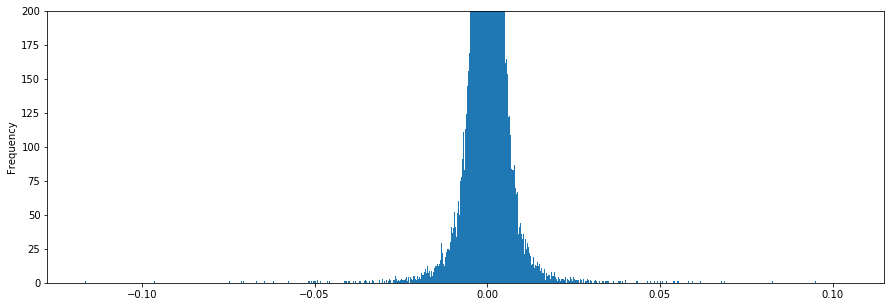

In [80]:
price_diff.plot.hist(bins=1000, figsize=(15, 5), ylim=(0, 200))

In [65]:
price_diff.mean()

6.363941197231803e-05

In [82]:
price_diff[price_diff < -0.0005].size, price_diff[price_diff > 0.0005].size

(20112, 22320)

In [76]:
price_diff.size

65120